In [1]:
import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd

idx = pd.IndexSlice

pd.options.display.max_columns = 100

Load the Boulder and Broomfield weather data from Week 1.

In [6]:
boulder_df = pd.read_csv('boulder_weather.csv',
                         header=1,
                         sep='|'
                        )
boulder_df.head()

,2010-01-01,30.4,24.8,39.2,9.9,828.5,46.9,6.1,11.1,Unnamed: 9,0.0
0,2010-01-02,32.3,21.2,44.6,19.6,825.1,29.4,5.5,12.0,NaN,0.0
1,2010-01-03,33.9,28.4,39.2,20.4,830.1,27.8,5.2,12.0,20.0,NaN
2,2010-01-04,30.7,19.4,41.0,19.3,831.7,36.1,2.7,6.0,NaN,0.0
3,2010-01-05,39.9,28.4,48.2,17.6,825.5,43.1,9.3,25.1,33.0,0.0
4,2010-01-06,28.0,8.6,46.4,15.6,825.2,13.6,9.9,24.1,28.0,NaN


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt

In [11]:
broomfield_df = pd.read_csv('broomfield_weather.csv',
                         header=1,
                         sep='|'
                        )
broomfield_df.head()

,2010-02-01,46.8,44.6,50.0,11.3,Unnamed: 5,10.0,11.9,15.9,25.1,0.0
0,2010-02-02,36.9,26.6,46.4,14.6,NaN,10.0,2.5,9.9,20.0,0.0
1,2010-02-03,38.3,30.2,48.2,18.9,NaN,10.0,1.2,4.1,NaN,0.0
2,2010-02-04,41.7,33.8,51.8,26.8,NaN,8.9,3.7,26.0,33.0,NaN
3,2010-02-05,41.7,32.0,50.0,13.9,NaN,10.0,5.3,23.9,30.9,0.0
4,2010-02-06,35.5,30.2,44.6,27.6,NaN,7.5,1.9,8.9,NaN,0.0


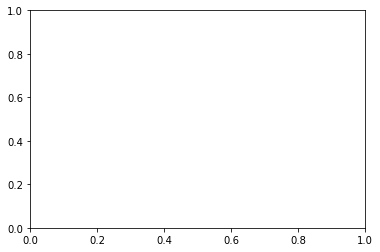

In [12]:
f, ax = plt.subplots()

We can call the `f` Figure object and it will return the (now-empty) visualization.

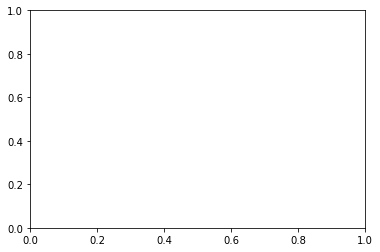

In [13]:
f

In [14]:
f.get_axes()

[<AxesSubplot:>]

In [15]:
ax.get_children()

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

The rectangle object is a box that has a height and width of 1 and starts at the origin (0,0).

In [16]:
rect = ax.get_children()[-1]
rect.get_height(), rect.get_width(), rect.get_xy()

(1.0, 1.0, (0.0, 0.0))

We could mutate this Rectangle: color it red and give it a new width and height.

In [17]:
rect.set_facecolor('red')
rect.set_height(.5)
rect.set_width(.5)

If we check the `f` object again, we can see this rectangle within the axes object within the figure object is now red and has half the height and width as before.

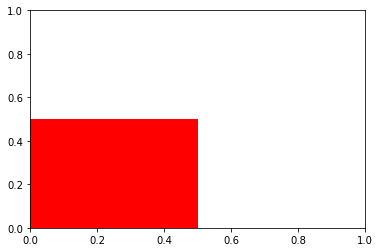

In [18]:
f

In [19]:
rect.set_edgecolor('green')
rect.set_linewidth(10)
rect.set_linestyle('--')

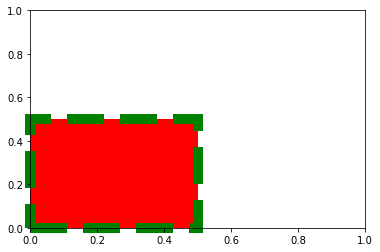

In [20]:
f

In [21]:
boulder_temps = boulder_df['TEMP'].values
boulder_temps

KeyError: 'TEMP'

Now make an empty figure and subplot.

In [ ]:
f,ax = plt.subplots()

In [ ]:
ax.hist(boulder_temps)

But where's the plot? Check `f`.

In [ ]:
f

In [ ]:
f,ax = plt.subplots()
ax.hist(boulder_temps); # Silence the bin counts and boundaries

NameError: name 'boulder_temps' is not defined

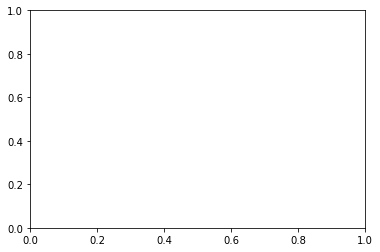

In [22]:
f,ax = plt.subplots()
ax.hist(boulder_temps,bins=5);

NameError: name 'boulder_temps' is not defined

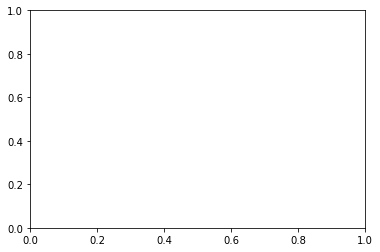

In [23]:
f,ax = plt.subplots()
ax.hist(boulder_temps,bins=50);

Try a really big number of bins. The bimodal distribution is perhaps clearer here, but this probably more bins than intended for a histogram.

NameError: name 'boulder_temps' is not defined

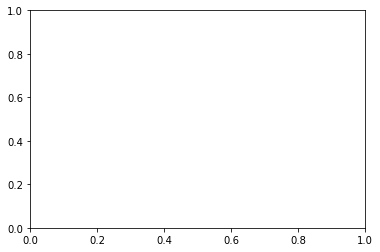

In [24]:
f,ax = plt.subplots()
ax.hist(boulder_temps,bins=500)

ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Count (Days)')
ax.set_title('Temperatures in Boulder, Colorado (2010-2021)')

f.savefig('too_many_bins.png',facecolor='w')

NameError: name 'boulder_temps' is not defined

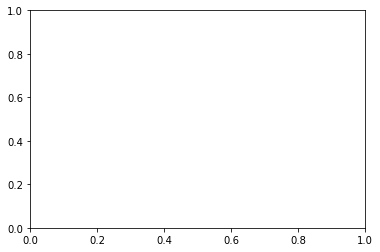

In [25]:
f,ax = plt.subplots()
ax.hist(boulder_temps,bins=25)

ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Count (Days)')
ax.set_title('Temperatures in Boulder, Colorado (2010-2021)')

KeyError: 'TEMP'

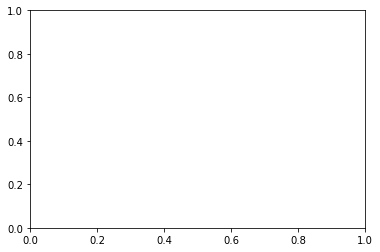

In [26]:
f,ax = plt.subplots()

ax.hist(broomfield_df['TEMP'],bins=25);

KeyError: 'TEMP'

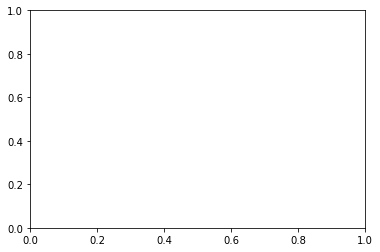

In [27]:
f,a_subplot = plt.subplots()

broomfield_df['TEMP'].plot.hist(ax=a_subplot,bins=50)

## Skewed data

The weather data has nice statistical and visual properties of being (approximately) normally distributed. Many kinds of data do not have this property and instead show a strong skew with low counts being significantly more represented than high counts.

Load in the county COVID data from Week 3 as `co_covid_df`.

In [30]:
co_covid_df = pd.read_csv('co_county_covid.csv')
co_covid_df.head()

,Date,County,Cases,Deaths,Month,Year
0,2020-03-01,Adams,0.0,0.0,3,2020
1,2020-03-02,Adams,0.0,0.0,3,2020
2,2020-03-03,Adams,0.0,0.0,3,2020
3,2020-03-04,Adams,0.0,0.0,3,2020
4,2020-03-05,Adams,1.0,0.0,3,2020


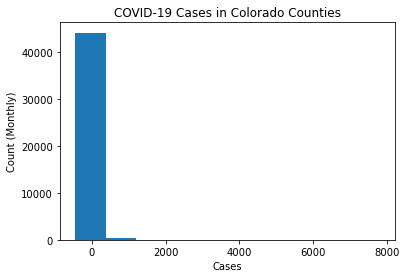

In [31]:
covid_cases = co_covid_df['Cases'].values

f,ax = plt.subplots()
ax.hist(covid_cases)

ax.set_xlabel('Cases')
ax.set_ylabel('Count (Monthly)')
ax.set_title('COVID-19 Cases in Colorado Counties')

f.savefig('county_cases.png',facecolor='w')

Even adding more bins does not improve this visualization.

Text(0.5, 1.0, 'COVID-19 Cases in Colorado Counties')

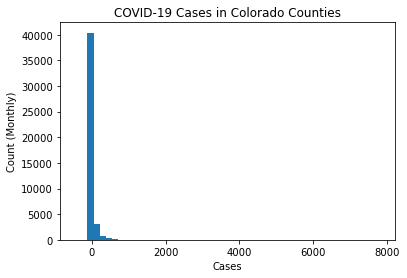

In [32]:
f,ax = plt.subplots()
ax.hist(covid_cases,bins=50)

ax.set_xlabel('Cases')
ax.set_ylabel('Count (Monthly)')
ax.set_title('COVID-19 Cases in Colorado Counties')

In [33]:
np.linspace(1,10000,11)

array([    1. ,  1000.9,  2000.8,  3000.7,  4000.6,  5000.5,  6000.4,
        7000.3,  8000.2,  9000.1, 10000. ])

In [34]:
np.geomspace(1,10000,11) # The start and stop values are in base units 10^0 = 1, 10^4 = 10000

array([    1.        ,     2.51188643,     6.30957344,    15.84893192,
          39.81071706,   100.        ,   251.18864315,   630.95734448,
        1584.89319246,  3981.07170553, 10000.        ])

We can pass these bin boundaries into the "bins" parameter for `hist`.

Text(0.5, 1.0, 'COVID-19 Cases in Colorado Counties')

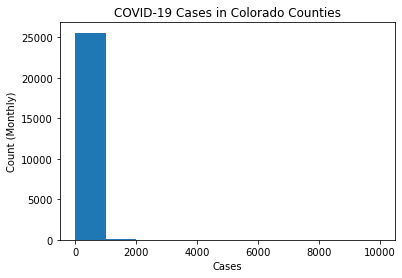

In [35]:
f,ax = plt.subplots()
ax.hist(covid_cases,bins=np.linspace(1,10000,11)) # Linear bin sizes

ax.set_xlabel('Cases')
ax.set_ylabel('Count (Monthly)')
ax.set_title('COVID-19 Cases in Colorado Counties')

Use the geometrically-spaced bins instead. There's definitely something different going on here!

Text(0.5, 1.0, 'COVID-19 Cases in Colorado Counties')

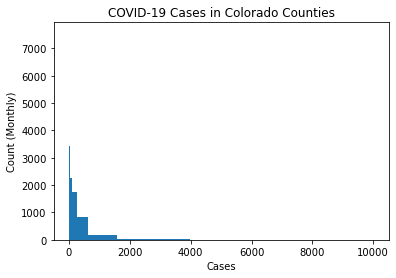

In [36]:
f,ax = plt.subplots()
ax.hist(covid_cases,bins=np.geomspace(1,10000,11)) # Geometric bin sizes

ax.set_xlabel('Cases')
ax.set_ylabel('Count (Monthly)')
ax.set_title('COVID-19 Cases in Colorado Counties')

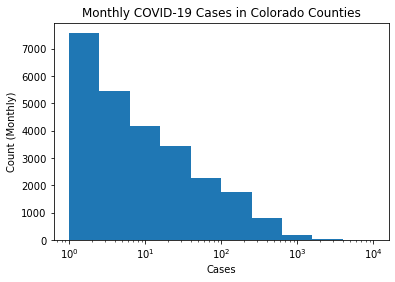

In [37]:
f,ax = plt.subplots()
ax.hist(covid_cases,bins=np.geomspace(1,10000,11)) # Geometric bin sizes

ax.set_xlabel('Cases')
ax.set_ylabel('Count (Monthly)')
ax.set_title('Monthly COVID-19 Cases in Colorado Counties')

ax.set_xscale('log')
# ax.set_yscale('log')

In [38]:
# https://stackoverflow.com/a/58331860/1574687

# Rescale data to be (0,1)
from sklearn.preprocessing import minmax_scale
_size = 1000

# Make random distributions of different shapes
random_exponential = minmax_scale(np.random.exponential(size=_size),feature_range=(0,1))
random_lognormal = minmax_scale(np.random.lognormal(size=_size),feature_range=(0,1))
random_pareto = minmax_scale(np.random.pareto(.9,size=_size),feature_range=(0,1))
random_power = minmax_scale(np.random.power(.1,size=_size),feature_range=(0,1))

On linear axes and bins these distributions look pretty similar.

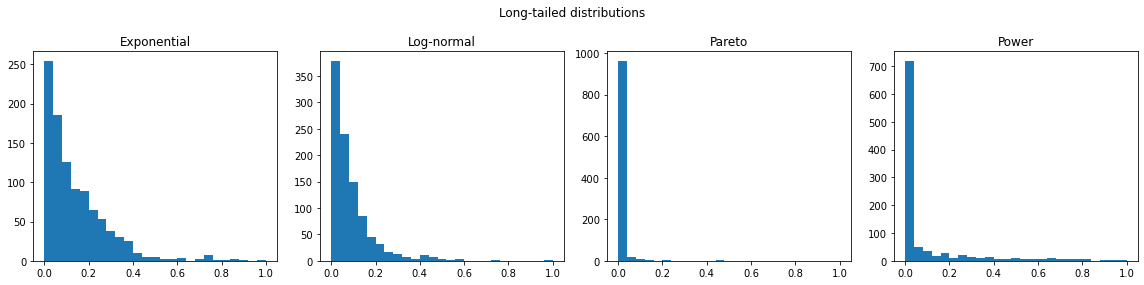

In [39]:
# Make four subplots
f,(ax0,ax1,ax2,ax3) = plt.subplots(
    nrows = 1,
    ncols = 4,
    figsize=(16,4)
)

# Histograms for each subplot
ax0.hist(random_exponential,bins=25)
ax1.hist(random_lognormal,bins=25)
ax2.hist(random_pareto,bins=25)
ax3.hist(random_power,bins=25)

# Set titles
ax0.set_title('Exponential')
ax1.set_title('Log-normal')
ax2.set_title('Pareto')
ax3.set_title('Power')

# Super-title and cleanup
f.suptitle('Long-tailed distributions')
f.set_facecolor('w')
f.tight_layout()

On log axes and bins they look very different!

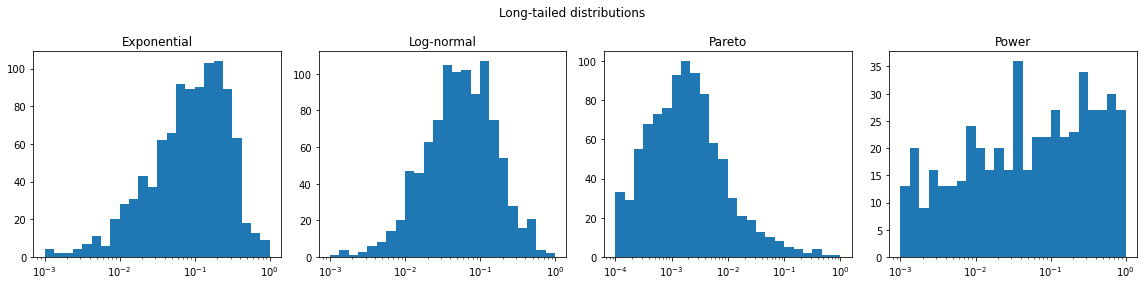

In [40]:
# Make four subplots
f,(ax0,ax1,ax2,ax3) = plt.subplots(
    nrows = 1,
    ncols = 4,
    figsize = (16,4),
    subplot_kw = {'xscale':'log'}
)

# Histograms for each subplot with geomspace bins
ax0.hist(random_exponential,bins=np.geomspace(1e-3,1e0,25))
ax1.hist(random_lognormal,bins=np.geomspace(1e-3,1e0,25))
ax2.hist(random_pareto,bins=np.geomspace(1e-4,1e0,25))
ax3.hist(random_power,bins=np.geomspace(1e-3,1e0,25))

# Set titles
ax0.set_title('Exponential')
ax1.set_title('Log-normal')
ax2.set_title('Pareto')
ax3.set_title('Power')

# Super-title and cleanup
f.suptitle('Long-tailed distributions')
f.set_facecolor('w')
f.tight_layout()

In [41]:
co_covid_df.head()

,Date,County,Cases,Deaths,Month,Year
0,2020-03-01,Adams,0.0,0.0,3,2020
1,2020-03-02,Adams,0.0,0.0,3,2020
2,2020-03-03,Adams,0.0,0.0,3,2020
3,2020-03-04,Adams,0.0,0.0,3,2020
4,2020-03-05,Adams,1.0,0.0,3,2020


<AxesSubplot:ylabel='Frequency'>

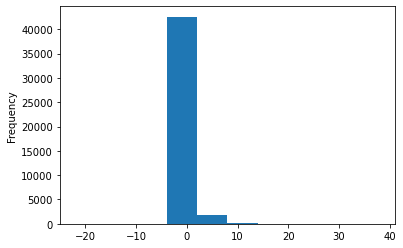

In [42]:
f,covid_deaths_ax = plt.subplots()

co_covid_df['Deaths'].plot.hist(ax=covid_deaths_ax)

In [43]:
no_neg_deaths = co_covid_df[co_covid_df['Deaths'] > 0]

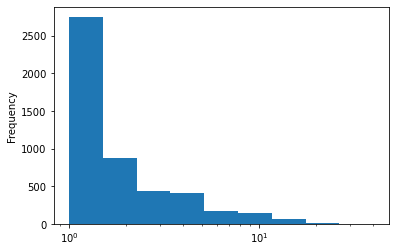

In [44]:
f,ax = plt.subplots()
no_neg_deaths['Deaths'].plot.hist(ax=ax,bins=np.geomspace(1,40,10))
ax.set_xscale('log')

In [45]:
boulder_df.shape, broomfield_df.shape

((4614, 11), (4560, 11))

In [ ]:
boulder_temps = both_df['TEMP_BOULDER'].values
broomfield_temps = both_df['TEMP_BROOMFIELD'].values

Option 1 is to make side-by-side plots. The "ncols" parameter is changed from default 1 to 2. Now the `subplots` function produces two subplot axes that I capture as `ax0` and `ax1`.

In [ ]:
f,(ax0,ax1) = plt.subplots(1,2)

In [ ]:
f,(ax0,ax1) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(8,4),
    sharey=True
)

ax0.hist(boulder_temps,bins=25)
ax1.hist(broomfield_temps,bins=25)

ax0.set_xlabel('Temperature (F)')
ax0.set_ylabel('Count (Days)')
ax0.set_title('Boulder, Colorado')

ax1.set_xlabel('Temperature (F)')
ax1.set_ylabel('Count (Days)')
ax1.set_title('Broomfield, Colorado')

f.suptitle('Temperatures 2010-2021',fontweight='heavy')
f.tight_layout()

f.savefig('hist_temp_boulder_broomfield.png',facecolor='w')

Option 2 is to make the histogram on a single plot but with different bars for each city. This is hard with default matplotlib, but is easier with pandas and seaborn.

stack ([docs](https://numpy.org/doc/stable/reference/generated/numpy.stack.html)) the two arrays together (similar to a concat).

In [50]:
# Stack the numpy arrays together
stacked_arrays = np.stack([boulder_temps,broomfield_temps],axis=1)
boulder_temps.shape, broomfield_temps.shape, stacked_arrays.shape

NameError: name 'boulder_temps' is not defined

NameError: name 'stacked_arrays' is not defined

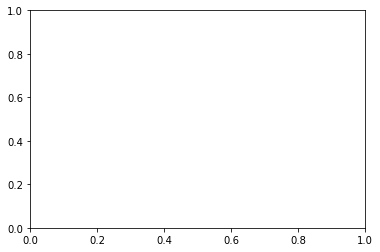

In [49]:
f,ax = plt.subplots()

ax.hist(
    stacked_arrays,
    bins = 15,
    histtype = 'bar', 
    color = ['tab:red','tab:blue'], 
    label = ['Boulder','Broomfield']
)

ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Count (Days)')
ax.set_title('Temperatures (2010-2021)',fontweight='heavy')
ax.legend(prop={'size': 10})

Option 3 is to stack the bars on top of each other. This is perceptually hard to compare to identify differences in many cases.

NameError: name 'stacked_arrays' is not defined

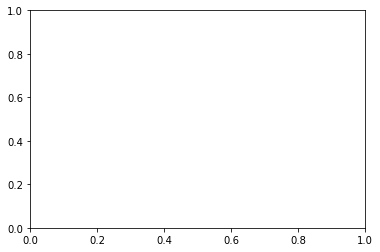

In [48]:
f,ax = plt.subplots()

ax.hist(
    stacked_arrays,
    bins = 15,
    histtype = 'bar', 
    stacked = True,
    color = ['tab:red','tab:blue'], 
    label = ['Boulder','Broomfield']
)

ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Count (Days)')
ax.set_title('Temperatures (2010-2021)',fontweight='heavy')
ax.legend(prop={'size': 10})

Plotting a cumulative histogram.

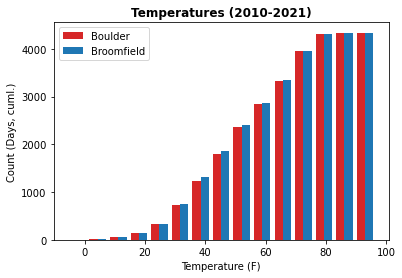

In [62]:
f,ax = plt.subplots()

ax.hist(
    stacked_arrays,
    bins = 15,
    histtype = 'bar', 
    cumulative = True,
    color = ['tab:red','tab:blue'], 
    label = ['Boulder','Broomfield']
)

ax.set_xlabel('Temperature (F)')
ax.set_ylabel('Count (Days, cuml.)')
ax.set_title('Temperatures (2010-2021)',fontweight='heavy')
ax.legend(prop={'size': 10})

Making multiple plots with pandas.

In [108]:
co_covid_df.head()

,Year,Month,County,Cases,Deaths
0,2020,3,Adams,0.0,0.0
1,2020,3,Adams,0.0,0.0
2,2020,3,Adams,0.0,0.0
3,2020,3,Adams,0.0,0.0
4,2020,3,Adams,1.0,0.0


In [111]:
co_covid_df['County'].unique()

array(['Adams', 'Alamosa', 'Arapahoe', 'Archuleta', 'Baca', 'Bent',
       'Boulder', 'Broomfield', 'Chaffee', 'Cheyenne', 'Clear Creek',
       'Conejos', 'Costilla', 'Crowley', 'Custer', 'Delta', 'Denver',
       'Dolores', 'Douglas', 'Eagle', 'El Paso', 'Elbert', 'Fremont',
       'Garfield', 'Gilpin', 'Grand', 'Gunnison', 'Hinsdale', 'Huerfano',
       'Jackson', 'Jefferson', 'Kiowa', 'Kit Carson', 'La Plata', 'Lake',
       'Larimer', 'Las Animas', 'Lincoln', 'Logan', 'Mesa', 'Mineral',
       'Moffat', 'Montezuma', 'Montrose', 'Morgan', 'Otero', 'Ouray',
       'Park', 'Phillips', 'Pitkin', 'Prowers', 'Pueblo', 'Rio Blanco',
       'Rio Grande', 'Routt', 'Saguache', 'San Juan', 'San Miguel',
       'Sedgwick', 'Summit', 'Teller', 'Unknown', 'Washington', 'Weld',
       'Yuma'], dtype=object)

In [112]:
13*5

65

In [117]:
axs.shape

(13, 5)

In [118]:
co_covid_df.head()

,Year,Month,County,Cases,Deaths
0,2020,3,Adams,0.0,0.0
1,2020,3,Adams,0.0,0.0
2,2020,3,Adams,0.0,0.0
3,2020,3,Adams,0.0,0.0
4,2020,3,Adams,1.0,0.0


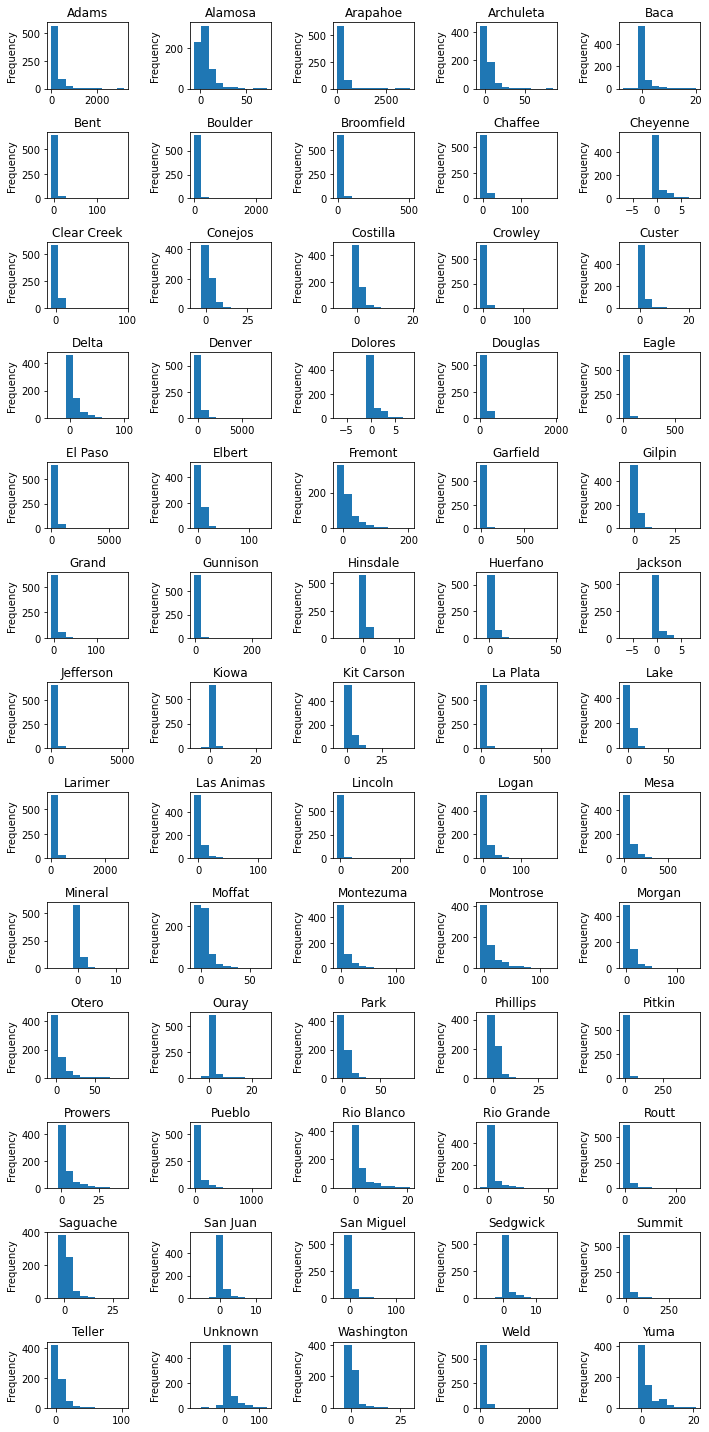

In [128]:
f,axs = plt.subplots(nrows=13,ncols=5,figsize=(10,20))

co_covid_df.plot.hist(
    column='Cases',
    by=['County'],
    ax=axs,
    legend=False,
#     bins=np.geomspace(1,5000,10)
);

f.tight_layout()

<AxesSubplot:>

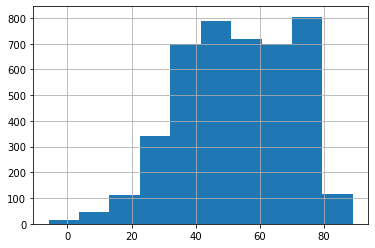

In [63]:
both_df['TEMP_BOULDER'].hist()

You could also call `.hist()` on a DataFrame and get a histogram for each.

array([[<AxesSubplot:title={'center':'TEMP_BOULDER'}>,
        <AxesSubplot:title={'center':'TEMP_BROOMFIELD'}>]], dtype=object)

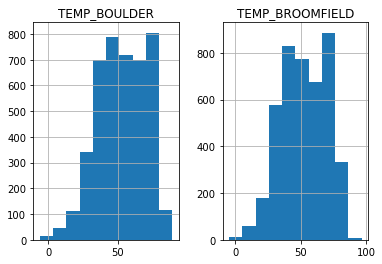

In [64]:
both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].hist()

The `.plot.hist()` method is distinct and will draw stacked, cumulative, horizontal and others.

<AxesSubplot:ylabel='Frequency'>

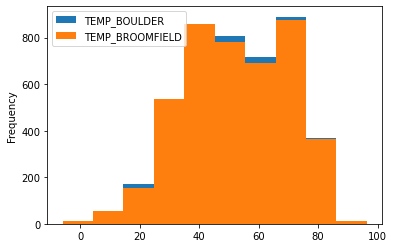

In [65]:
both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].plot.hist()

<AxesSubplot:ylabel='Frequency'>

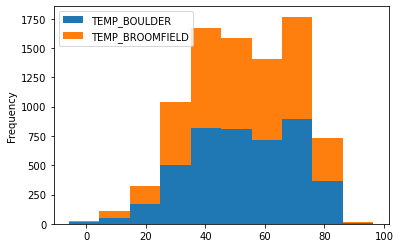

In [66]:
both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].plot.hist(stacked=True)

<AxesSubplot:xlabel='Frequency'>

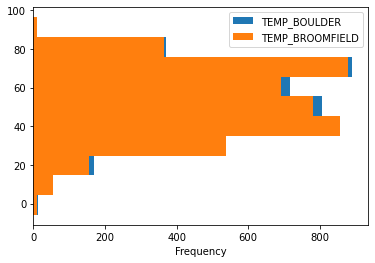

In [67]:
both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].plot.hist(orientation='horizontal')

<AxesSubplot:xlabel='Frequency'>

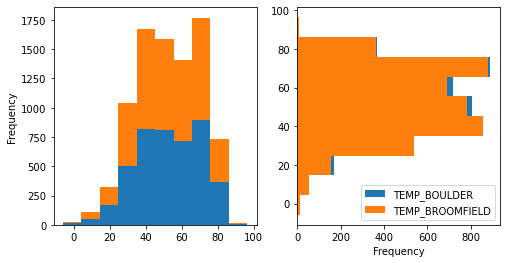

In [68]:
f,(ax0,ax1) = plt.subplots(ncols=2,figsize=(8,4))

both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].plot.hist(stacked=True,ax=ax0,legend=False)
both_df[['TEMP_BOULDER','TEMP_BROOMFIELD']].plot.hist(orientation='horizontal',ax=ax1)

In [135]:
no_neg_deaths.head(2)

,Year,Month,County,Cases,Deaths
30,2020,3,Adams,32.0,2.0
31,2020,4,Adams,29.0,4.0


<AxesSubplot:ylabel='Frequency'>

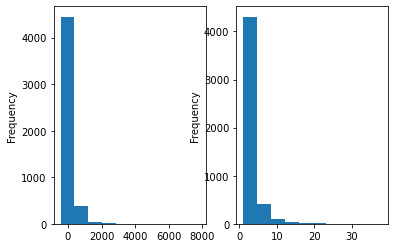

In [139]:
f,(ax0,ax1) = plt.subplots(1,2)

no_neg_deaths['Cases'].plot.hist(ax=ax0)
no_neg_deaths['Deaths'].plot.hist(ax=ax1)

# ax0.set_xscale('log')
# ax1.set_xscale('log')

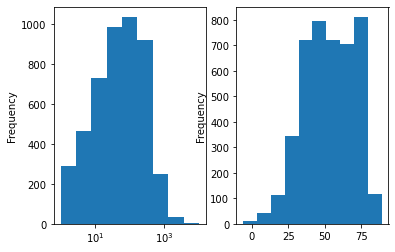

In [141]:
f,(ax0,ax1) = plt.subplots(1,2)

no_neg_deaths['Cases'].plot.hist(ax=ax0,bins=np.geomspace(1,10000,10))
boulder_df['TEMP'].plot.hist(ax=ax1)

ax0.set_xscale('log')
# ax1.set_xscale('log')

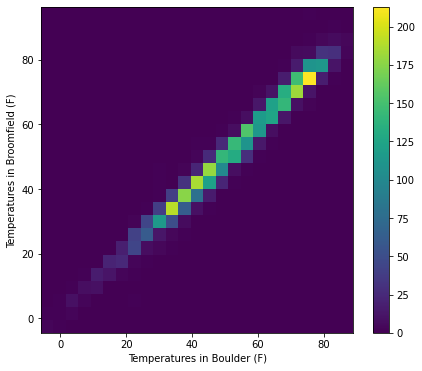

In [69]:
f,ax = plt.subplots(figsize=(7,6))

counts, xedges, yedges, im = ax.hist2d(
    x = boulder_temps,
    y = broomfield_temps,
    bins = 25
)

ax.set_xlabel('Temperatures in Boulder (F)')
ax.set_ylabel('Temperatures in Broomfield (F)')
f.colorbar(im,ax=ax)